In [8]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval

from elite_optionstrategy import BacktestingEngine

from short_strangle_strategy import ShortStrangleStrategy

In [14]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2021, 1, 1),
    end=datetime(2022, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)

setting = {"otm_level": 4}
engine.add_strategy(ShortStrangleStrategy, setting)

In [15]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 729/729 [31:52<00:00,  2.62s/it]


In [16]:
# 计算每日盈亏
engine.calculate_result()

2024-02-19 14:16:16.884909	开始计算逐日盯市盈亏
2024-02-19 14:16:16.889683	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage  trading_pnl  \
date                                                                   
2021-01-04            2    2260.0         0.0     152.0        900.0   
2021-01-05            0       0.0         0.0       0.0          0.0   
2021-01-06            0       0.0         0.0       0.0          0.0   
2021-01-07            0       0.0         0.0       0.0          0.0   
2021-01-08            0       0.0         0.0       0.0          0.0   
...                 ...       ...         ...       ...          ...   
2022-12-26            0       0.0         0.0       0.0          0.0   
2022-12-27            0       0.0         0.0       0.0          0.0   
2022-12-28            0       0.0         0.0       0.0          0.0   
2022-12-29            0       0.0         0.0       0.0          0.0   
2022-12-30            0       0.0         0.0       0.0          0.0   

            holding_pnl  total_pnl  net_pnl  
date                                         
2021-01-04          0.0      900.0    748.0  
2021-01-05       -500.0     -500.0   -500.0  
2021-01-06      -1100.0    -1100.0  -1100.0  
2021-01-07      -3860.0    -3860.0  -3860.0  
2021-01-08       1560.0     1560.0   1560.0  
...                 ...        ...      ...  
2022-12-26        720.0      720.0    720.0  
2022-12-27       1780.0     1780.0   1780.0  
2022-12-28        -20.0      -20.0    -20.0  
2022-12-29       -200.0     -200.0   -200.0  
2022-12-30        800.0      800.0    800.0  

[485 rows x 8 columns]

In [17]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-02-19 14:16:16.948352	开始计算策略统计指标
2024-02-19 14:16:16.970616	------------------------------
2024-02-19 14:16:16.970616	首个交易日：	2021-01-04 00:00:00
2024-02-19 14:16:16.970616	最后交易日：	2022-12-30 00:00:00
2024-02-19 14:16:16.970616	总交易日：	485
2024-02-19 14:16:16.970616	盈利交易日：	320
2024-02-19 14:16:16.970616	亏损交易日：	158
2024-02-19 14:16:16.970616	起始资金：	1,000,000.00
2024-02-19 14:16:16.970616	结束资金：	1,043,280.00
2024-02-19 14:16:16.970616	总收益率：	4.33%
2024-02-19 14:16:16.970616	年化收益：	2.14%
2024-02-19 14:16:16.970616	最大回撤: 	-48,000.00
2024-02-19 14:16:16.970616	最大回撤%: 	-4.73%
2024-02-19 14:16:16.970616	总盈亏：	43,280.00
2024-02-19 14:16:16.970616	总手续费：	0.00
2024-02-19 14:16:16.970616	总滑点：	3,800.00
2024-02-19 14:16:16.970616	总成交金额：	128,700.00
2024-02-19 14:16:16.970616	总成交笔数：	50
2024-02-19 14:16:16.970616	日均盈亏：	89.24
2024-02-19 14:16:16.970616	日均手续费：	0.00
2024-02-19 14:16:16.970616	日均滑点：	7.84
2024-02-19 14:16:16.970616	日均成交金额：	265.36
2024-02-19 14:16:16.970616	日均成交笔数：	0.10309278350515463
2024-02-19

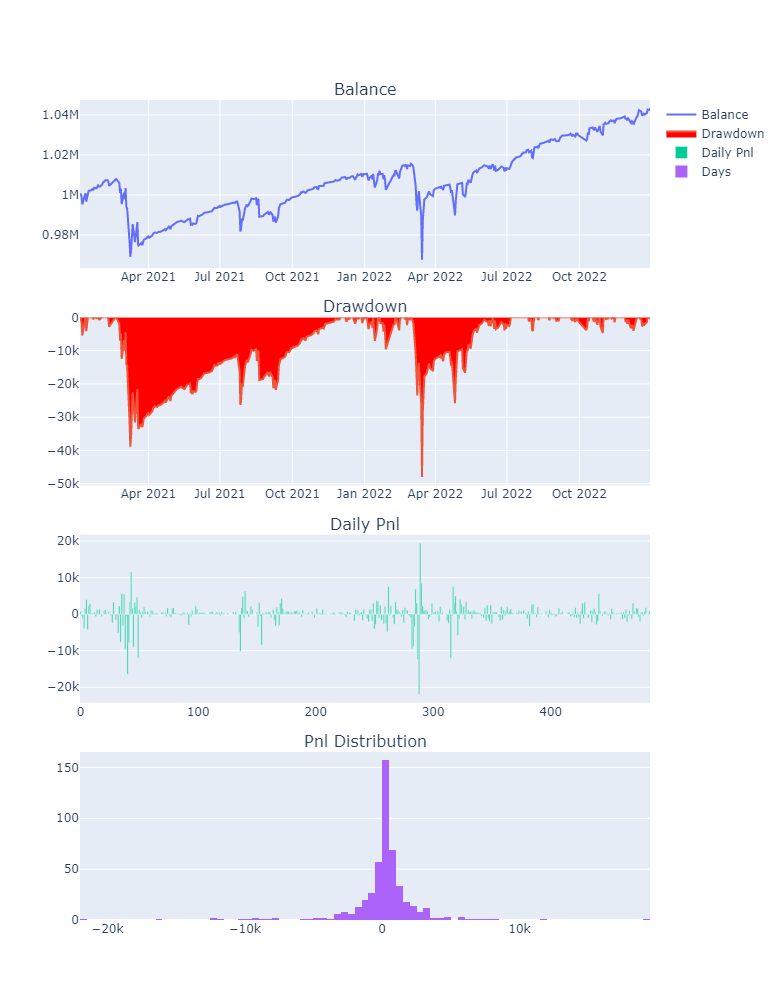

In [18]:
# 显示资金图表
engine.show_chart()

In [ ]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)